In [1]:
from synthetic_data import return_synthetic_data,plot_synthetic
import sys  
sys.path.insert(0, "/".join(sys.path[0].split("/")[0:-2])+('/src'))
from sisal.solver import Solver
from sisal.utils import normalize_train_test_full_loader
import argparse
from sisal.plot import Plot
import random
import numpy as np
import torch

# Synthetic data

In [2]:
centroids,SNR,mask,mask_to_name = return_synthetic_data()
print('centroids = ',centroids.shape)
print('SNR : ', SNR.shape)
print('mask : ', mask.shape)

centroids =  (238428, 212)
SNR :  (238428,)
mask :  (238428,)


In [3]:
train_loader, test_loader, full_index_loader = normalize_train_test_full_loader(centroids,mask,batch_size=32,alpha=SNR)

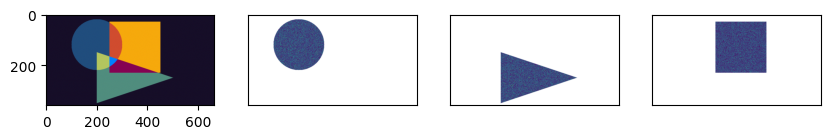

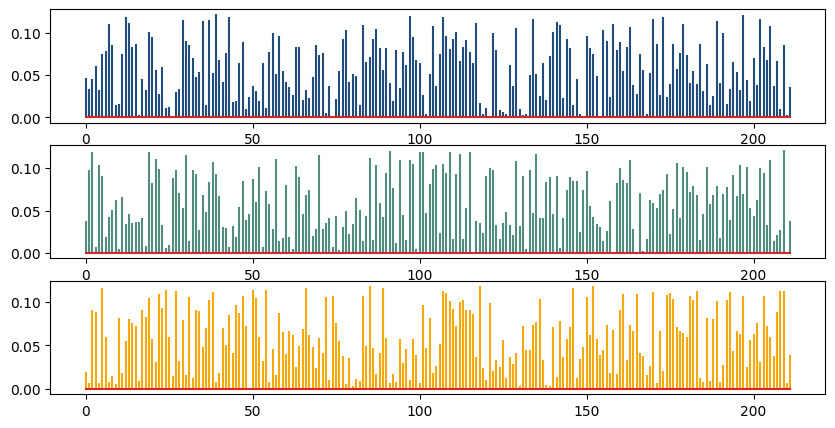

In [4]:
plot_synthetic()

## Arguments for the Beta VAE

In [5]:
args = argparse.Namespace(
    beta=4, 
    z_dim=2, 
    in_size = centroids.shape[1],
    epochs=40,
    device ='cpu',
    save_model_epochs=False,
    save_loss = False,
    train=True)

In [6]:
# For reproducibility 

# Set a fixed seed
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)  #Reproducibility across GPUs

# Deterministic behavior
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## Training SISAL model

In [8]:
net = Solver(
    args.beta,
    args.z_dim,
    args.in_size,
    args.epochs,
    args.device,
    args.save_model_epochs,
    args.save_loss,
    args.train)

### Path where the model is saved

In [9]:
PATH = 'model_synthetic.pth'

In [10]:
net.train(train_loader, test_loader,PATH) 

Training model:   0%|          | 0/40 [00:41<?, ?epoch/s]


KeyboardInterrupt: 

In [8]:
p = Plot(PATH,args.device,train_loader,test_loader,full_index_loader)

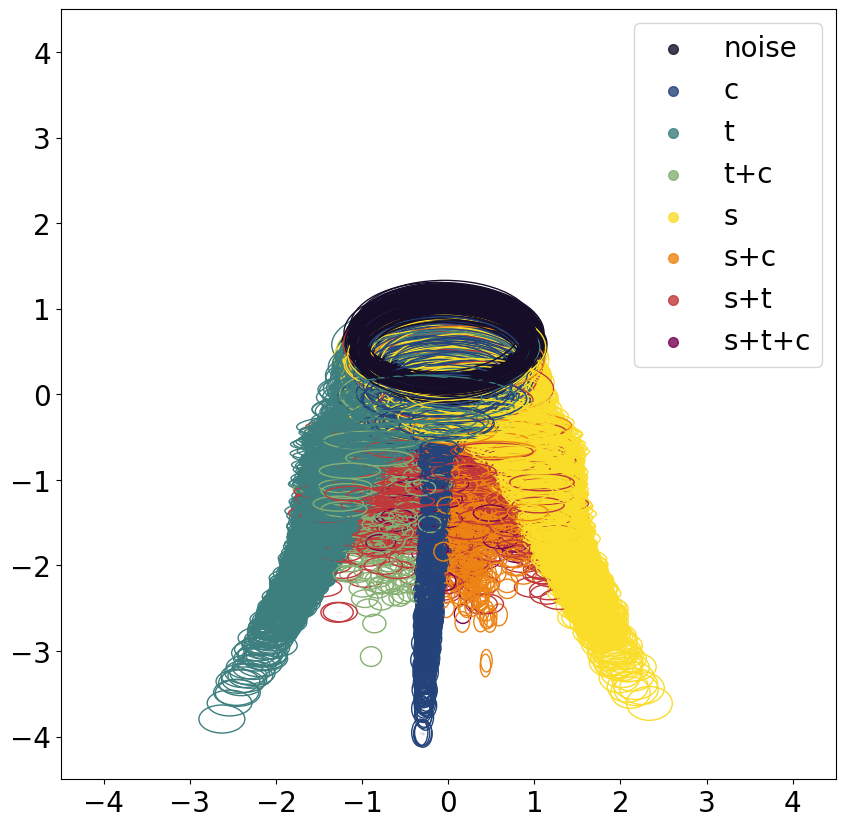

In [9]:
p.plot_latent_dim_with_var(mask_to_name,p=0.2)

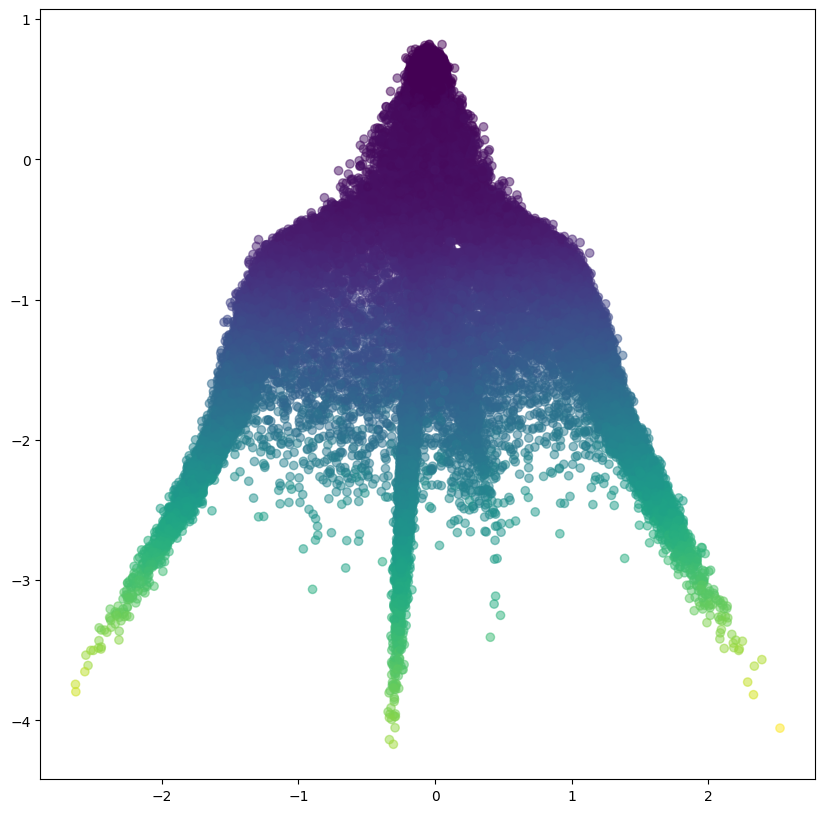

In [10]:
p.plot_latent_dim_coeff(p=0.7)  